#Exploratory Data Analysis

Before beginning any analysis, let us recap the source of our data that we can keep in mind as we conduct the analysis.

1. 1200 relevant posts from r/IndiaSpeaks evenly spaced out over the last 18 months of the flair #Social-Issues.
2. 800 relevant posts from r/India that contain the keywords "social" and "problem" or the keywords "social" and "issue".


Let us import the libraries we will require for data manipulation and visualization. The most important libraries are Pandas, Plotly, Matplotlib, ScikitLearn, nltk, textblob and pyldavis

In [ ]:
!pip install chart_studio
!pip install textblob
!pip install pyldavis

     |████████████████████████████████| 64 kB 2.8 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=ea1e57d454bf71d9246bba21b28a8dbbfaea53a00e00057fd645fa60449d7a23
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
     |████████████████████████████████| 1.7 MB 8.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyldavis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=01d456f2b052b71a37763366c68f9ad2cdca4c2293163795076aa6c465d88c39
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyldavis


In [ ]:
import plotly.graph_objs as go
import chart_studio.plotly as py
import cufflinks
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import pandas as pd
import math
import numpy as np

In [ ]:
df_path = '/content/drive/MyDrive/Wysa/df_preproc.pkl'

df = pd.read_pickle(df_path)
df.head()

,author,created_utc,full_link,is_original_content,is_self,is_video,link_flair_text,num_comments,over_18,score,...,upvote_ratio,fulltext,year,month,day,hour,minute,second,ctext,lemma_text
0,InternetFreedomIn,1628168541,https://www.reddit.com/r/india/comments/oyh2uq...,False,True,False,Policy/Economy,0,False,1,...,1.0,#4 Cybersec Charcha: A Global overview of the ...,2021,8,5,13,2,21,cybersec charcha a global overview of the sta...,cybersec charcha global overview state surveil...
1,adam0010101,1628452706,https://www.reddit.com/r/india/comments/p0lpok...,False,True,False,Politics,0,False,1,...,1.0,Indian social divisions and political redresse...,2021,8,8,19,58,26,indian social divisions and political redresse...,indian social division political redress despi...
2,MaharajadhirajaSawai,1629126680,https://www.reddit.com/r/india/comments/p5i0b6...,False,True,False,History,9,False,1,...,1.0,My critique of The Carvaka Podcast's Warhorse ...,2021,8,16,15,11,20,my critique of the carvaka podcasts warhorse e...,critique carvaka podcasts warhorse evolution e...
3,InternetFreedomIn,1627026319,https://www.reddit.com/r/india/comments/opxkgc...,False,True,False,Policy/Economy,11,False,1,...,1.0,"Dear Standing Committee, We Have Some Question...",2021,7,23,7,45,19,dear standing committee we have some questions...,dear standing committee question pegasus ampx2...
4,wanderingmind,1628683922,https://www.reddit.com/r/india/comments/p2btn6...,False,True,False,Non-Political,17,False,1,...,1.0,"Barking, biting stray dogs, hypocritical dog-l...",2021,8,11,12,12,2,barking biting stray dogs hypocritical doglove...,barking biting stray dog hypocritical doglover...


## Numerical/Categorical Feature Analysis

Let us list down various types of analysis we can do on the numerical/categorical features of the data:

1. Average scores of posts.
2. Average number of comments on each post.
3. Information regarding most active user.
4. Score distribution
5. Comment distribution
6. Relation between scores and comments
7. Distribution of flairs
8. Seeing the distribution of number posts over time according to flair
9. Flair-wise score box plot
10. Flair-wise comments box plot

In [ ]:
def print_mmm(df, attribute):
    mean_score = df[attribute].mean()
    median_score = df[attribute].median()
    mode_score = df[attribute].mode()[0]
    print("Mean "+attribute, mean_score,"\nMedian "+attribute, median_score,"\nMode "+attribute, mode_score)

print_mmm(df, "score")

Mean score 14.268692715870719 
Median score 1.0 
Mode score 1


Insight: Since Median and Mode are both 1, while the mean is a lot higher at 14, it is very likely that we will find outliers in terms of scores in the dataset

In [ ]:
print_mmm(df, "num_comments")

Mean num_comments 18.805595754944523 
Median num_comments 2.0 
Mode num_comments 0


Observation: While a large number of posts do not have any comments, more than half the posts are having 2 or more comments.

Insight: Whenever a first comment shows up, the ball gets rolling and there is a chance that more comments begin to appear on the post. This shows the importance of a dialogue beginning.

In [ ]:
df['author'].value_counts().head(20)

dhatura              63
InternetFreedomIn    60
ChirpingSparrows     51
StarsAtLadakh        50
[deleted]            41
SwamiVivekamunun     33
poop-pee-die         30
itisverynice         25
littichoka           22
East-Secretary       19
_lameboy_            17
extra_gobi_kodi      17
xdesi                16
Sri_Man_420           9
oar_xf                8
luitdev               8
kumbhakaran           8
aksai_hind            7
BickKattowski         7
GoneWithThePaad       6
Name: author, dtype: int64

Observation: There are quite a few frequent authors who post regularly about social issues and problems facing India. Let us check out a couple of them and which subreddit they are posting from

In [ ]:
df[df['author']=="dhatura"]['subreddit'].value_counts()

IndiaSpeaks    63
Name: subreddit, dtype: int64

In [ ]:
df[df['author']=="InternetFreedomIn"]['subreddit'].value_counts()

india    60
Name: subreddit, dtype: int64

In [ ]:
df[df['author']=="InternetFreedomIn"]['link_flair_text'].value_counts()

Policy/Economy      53
Law &amp; Courts     5
Politics             1
Coronavirus          1
Name: link_flair_text, dtype: int64

We see that this user is heavily involved in posting about policy, economy, and the law. Quite naturally, these are problem evoking areas.

In [ ]:
print_mmm(df[df['author']=="InternetFreedomIn"], "score")
print_mmm(df[df['author']=="dhatura"], "score")

Mean score 27.166666666666668 
Median score 1.0 
Mode score 1
Mean score 2.507936507936508 
Median score 1.0 
Mode score 1


InternetFreedomIn seems to get quite a lot of traction on his posts. His mean score is much higher than that of the dataset

In [ ]:
InternetFreedomIn_filt = (df['author']=='InternetFreedomIn')
df.loc[InternetFreedomIn_filt,['score','num_comments','ctext','link_flair_text']].sort_values(by='score', ascending=False).head(15)

,score,num_comments,ctext,link_flair_text
152,471,145,read the it rules are officially in play this ...,Policy/Economy
184,303,133,scary disclosures on use of nso spyware in ind...,Policy/Economy
99,170,23,we urge the dot to unblock wetransfer open up ...,Policy/Economy
153,138,21,breaking draft it rules which seek to change t...,Policy/Economy
174,136,5,he sees you when youre sleeping he knows when ...,Policy/Economy
239,126,30,a comprehensive look at covid surveillance and...,Policy/Economy
154,91,19,mhas new programme allows volunteers to report...,Policy/Economy
20,68,23,revealed rti request uncovers meity letters to...,Policy/Economy
120,22,1,watch the watchmen series part the centralised...,Policy/Economy
171,21,3,urgent speech law reform needed to protect onl...,Policy/Economy


Let us now check out the distribution of scores present in the dataset


In [ ]:
fig = go.Figure(
    data=go.Histogram(x=df['score']),
    layout=go.Layout(title_text='Score distribution', 
                     xaxis_title_text='Score', 
                     yaxis_title_text='Count', 
                     bargap=0.2))
fig.show(renderer="colab")

In [ ]:
fig = go.Figure(
    data=go.Histogram(x=df['num_comments']),
    layout=go.Layout(title_text='Comments Distribution', 
                     xaxis_title_text='Comments', 
                     yaxis_title_text='Count', 
                     bargap=0.2))
fig.show(renderer="colab")

Observations:
1.   Both the score and comment distributions are highly skewed towards 0 to 5
2.   Both distributions have a very long tail, i.e. a large outlier lying at the far right
3.   Score distribution is skewed much more than the Comment distribution

Insights:
1. It is difficult for most posts to get off the ground and into the public eye. It would be interesting to know how many views a post gets as well. That way, we could identify when the reddit algorithm begins to push posts into the "hot" categories.
2. Once a post starts getting traction, it is more likely to have multiple comments rather than multiple upvotes.




In [ ]:
flair_order = df.groupby('link_flair_text').count()['created_utc'].sort_values(ascending=False)
fig = go.Figure(
    data=go.Bar(x=list(flair_order.keys()), y=list(flair_order)),
    layout=go.Layout(title_text='Flair Distribution', 
                     xaxis_title_text='Flairs', 
                     yaxis_title_text='Count', 
                     bargap=0.2))
fig.show(renderer="colab")

Let's take a look at one without #social-issues since part of the dataset is collected directly based on that flair

In [ ]:
flair_order = df[df['subreddit']=='india'].groupby('link_flair_text').count()['created_utc'].sort_values(ascending=False)
fig = go.Figure(
    data=go.Bar(x=list(flair_order.keys()), y=list(flair_order)),
    layout=go.Layout(title_text='Flair Distribution', 
                     xaxis_title_text='Flairs', 
                     yaxis_title_text='Count', 
                     bargap=0.2))
fig.show(renderer="colab")

Observation: On the India subreddit, most problems india is facing is discussed on the slightly generic "non-political" flair, the AskIndia flair, and the politics flair.

Insight: The AskIndia flair seems to be the accepted place for raising questions about problems. As the name suggests, people are initiating a discussion or a conversation @AskIndia.

In [ ]:
df['date'] = pd.to_datetime(df['created_utc'], unit='s')
dfn = df.set_index('date')
subreddit_group = dfn.groupby('subreddit')
resamp = subreddit_group.resample('M').count()

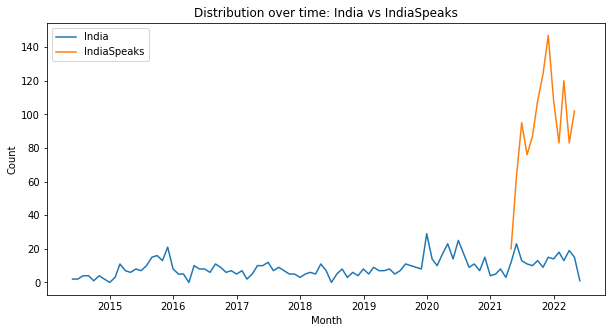

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
tmp = ax.set_title('Distribution over time: India vs IndiaSpeaks')
tmp = ax.set_xlabel('Month')
tmp = ax.set_ylabel('Count')
tmp = ax.plot(resamp['subreddit']['india'], label = "India")
tmp = ax.plot(resamp['subreddit']['IndiaSpeaks'], label = "IndiaSpeaks")
tmp = ax.legend()

Observation: The data collected from r/India was without a specific date range which allowed from posts beginning from 2014. However, the r/IndiaSpeaks subreddit only introduced the #social-issues flair 18 months ago, and hence the time distribution of number of posts is such. 

Therefore, to perform any further time based comparisons, we will have to split the dataset between the 2 subreddits.

In [ ]:
dfi = df[df['subreddit']=='india']
dfis = df[df['subreddit']=='IndiaSpeaks']
print(dfi.shape, dfis.shape)

(857, 25) (1216, 25)


In [ ]:
dfn = dfi.set_index('date')
flair_group = dfn.groupby('link_flair_text')
resamp = flair_group.resample('M').count()

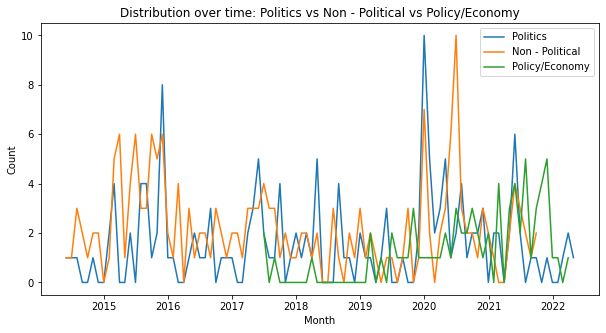

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
tmp = ax.set_title('Distribution over time: Politics vs Non - Political vs Policy/Economy')
tmp = ax.set_xlabel('Month')
tmp = ax.set_ylabel('Count')
tmp = ax.plot(resamp['link_flair_text']['Politics'], label = "Politics")
tmp = ax.plot(resamp['link_flair_text']['Non-Political'], label = "Non - Political")
tmp = ax.plot(resamp['link_flair_text']['Policy/Economy'], label = "Policy/Economy")
tmp = ax.legend()

Insight: Issues discussed in Policy related posts has been a more recent phenomenon, which can be considered a good sign as people are discussing specific issues related to policy.

On the other hand, number of political and non political posts relating to problems in India have been following similar trends to each other in the last 6 years

In [ ]:
y0 = df.loc[df['link_flair_text'] == 'Politics']['score']
y1 = df.loc[df['link_flair_text'] == 'Non-Political']['score']
y2 = df.loc[df['link_flair_text'] == 'Policy/Economy']['score']
y3 = df.loc[df['link_flair_text'] == 'AskIndia']['score']

trace0 = go.Box(
    y=y0,
    name = 'Politics',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)
trace1 = go.Box(
    y=y1,
    name = 'Non-Political',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)
trace2 = go.Box(
    y=y2,
    name = 'Policy/Economy',
    marker = dict(
        color = 'rgb(10, 140, 208)',
    )
)
trace3 = go.Box(
    y=y3,
    name = 'AskIndia',
    marker = dict(
        color = 'rgb(12, 102, 14)',
    )
)
data = [trace0, trace1, trace2, trace3]
layout = go.Layout(
    title = "score Boxplot flair-wise"
)
fig = go.Figure(data=data,layout=layout)
fig.show(renderer='colab')

Non-political posts tend to get the maximum upvotes. Policy/Economy and Political posts get fewer upvotes. AskIndia gets the least upvotes in general

Insight: Since AskIndia turns into more of a discussion than a post that gives information or entertains, it lacks that many upvotes. Therefore, one should choose flair accordingly

In [ ]:
y0 = df.loc[df['link_flair_text'] == 'Politics']['num_comments']
y1 = df.loc[df['link_flair_text'] == 'Non-Political']['num_comments']
y2 = df.loc[df['link_flair_text'] == 'Policy/Economy']['num_comments']
y3 = df.loc[df['link_flair_text'] == 'AskIndia']['num_comments']

trace0 = go.Box(
    y=y0,
    name = 'Politics',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)
trace1 = go.Box(
    y=y1,
    name = 'Non-Political',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)
trace2 = go.Box(
    y=y2,
    name = 'Policy/Economy',
    marker = dict(
        color = 'rgb(10, 140, 208)',
    )
)
trace3 = go.Box(
    y=y3,
    name = 'AskIndia',
    marker = dict(
        color = 'rgb(12, 102, 14)',
    )
)
data = [trace0, trace1, trace2, trace3]
layout = go.Layout(
    title = "Comments Boxplot flair-wise"
)
fig = go.Figure(data=data,layout=layout)
fig.show(renderer='colab')

The median trends observed in these boxplots are the same as those of Scores. Except for the AskIndia Flair. We see that the median comments in AskIndia are quite high and the number of higher end outliers is more than other flairs.

This confirms our belief that "AskIndia" is a good flair to initiate conversations and discussions with people on a post.

## Text Analysis

Possibly, the most important part of our dataset is the textual part of the posts. Each post has a title and selftext. For the textual analysis, we will use "title + selftext" and the title alone.

The different types of analysis we will perform:

1. Number of Characters distribution across posts
2. Number of Words distribution across posts
3. Number of words distribution across title
4. Word Cloud
5. N-Gram frequency
6. Topic Modeling using LDA
7. Topic Modeling using NMF
8. Sentiment Polarity Analysis
9. Correlation matrix

First, we create the cleaned copy of the title alone. We have already done the same for "title + selftext" in the previous notebook

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer
import tqdm
import string

def get_wordnet_tag(tag):
    if tag == 'ADJ':
        return 'j'
    elif tag == 'VERB':
        return 'v'
    elif tag == 'NOUN':
        return 'n'
    elif tag == 'ADV':
        return 'r'
    else:
        return 'n'

def lemmatize_text(title):
    stop = stopwords.words('english')
    lemmatizer = WordNetLemmatizer()

    words = list()
    title = word_tokenize(title)
    for word, tag in pos_tag(title):
        tag = get_wordnet_tag(tag)
        word = lemmatizer.lemmatize(word, tag)
        if word not in stop:
            words.append(word)
    
    return ' '.join(words) 

def clean_text(dataset):
    
    tqdm.tqdm.pandas()
    
    dataset['ctitle'] = dataset['title'].str.lower()
    dataset['ctitle'] = dataset['ctitle'].str.replace(r'\[oc\]', ' ')
    pattern_link = r'https?://[^\s]+|www\.[^\s]+|[^\s]+\.com[^\s]*|[^\s]+\.org[^\s]*|[^\s]+\.html[^\s]*'
    dataset['ctitle'] = dataset['ctitle'].str.replace(pattern_link, ' link ')
    
    pattern_punctuation = r'[' + string.punctuation + '’]'
    dataset['ctitle'] = dataset['ctitle'].str.replace(pattern_punctuation, '')
    dataset['ctitle'] = dataset['ctitle'].str.replace(r' [\d]+ |^[\d]+ | [\d]+$', ' ')
    dataset['ctitle'] = dataset['ctitle'].str.replace(r'[^\w\d\s]+', ' ')
    dataset['lemma_title'] = dataset['ctitle'].progress_apply(lambda text: lemmatize_text(text))
    dataset['ctitle'] = dataset['ctitle'].str.replace(r'\s[\s]+', ' ')
    dataset['lemma_title'] = dataset['lemma_title'].str.replace(r'\s[\s]+', ' ')

In [ ]:
fig = go.Figure(
    data=go.Histogram(x=list(df['ctext'].str.len())),
    layout=go.Layout(title_text='Character Length Distribution', 
                     xaxis_title_text='Number of characters', 
                     yaxis_title_text='Count', 
                     bargap=0.2))
fig.show(renderer="colab")

Observation: More than half the posts have number of characters within 500. Extreme outliers have single posts going up to 40k characters in length.

Insight: Although long character limits are allowed in Reddit, people tend to not go past 500 characters.

In [ ]:
fig = go.Figure(
    data=go.Histogram(x=sorted(list(df['ctext'].str.len()))[:1500]),
    layout=go.Layout(title_text='Character Length Distribution', 
                     xaxis_title_text='Number of characters', 
                     yaxis_title_text='Count', 
                     bargap=0.2))
fig.show(renderer="colab")

Observation: On ignoring the outlier cases, we find that the most frequent range for number of characters is 50-99 characters.

Insight: This substantiates our claim that although there is no restriction like twitter, people naturally do not require to go past 280 character limt.

In [ ]:
df['word_count'] = df['ctext'].apply(lambda x: len(x.split()))

In [ ]:
fig = go.Figure(
    data=go.Histogram(x=sorted(df['word_count'])[0:1500]),
    layout=go.Layout(title_text='Number of words Distribution', 
                     xaxis_title_text='Number of words', 
                     yaxis_title_text='Count', 
                     bargap=0.2))
fig.show(renderer="colab")

Observation: We see that lot of posts lie between 10 and 19 words.

Insight: This possibly means that most posts describing problems only have a title followed by a link in the selftext field. As only titles could be these many words long. However, let us check the length of titles to make sure.

In [ ]:
df['tword_count'] = df['ctitle'].apply(lambda x: len(x.split()))

In [ ]:
fig = go.Figure(
    data=go.Histogram(x=sorted(df['tword_count'])),
    layout=go.Layout(title_text='Title number of words distribution', 
                     xaxis_title_text='Number of words', 
                     yaxis_title_text='Count', 
                     bargap=0.2))
fig.show(renderer="colab")

As we can see, it is indeed the case that most titles are also between zero and twenty words, verifying our earlier claim.

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator
from nltk.probability import FreqDist

19463


(-0.5, 1399.5, 999.5, -0.5)

Text(0.5, 1.0, 'Top 100 Most Common Words')

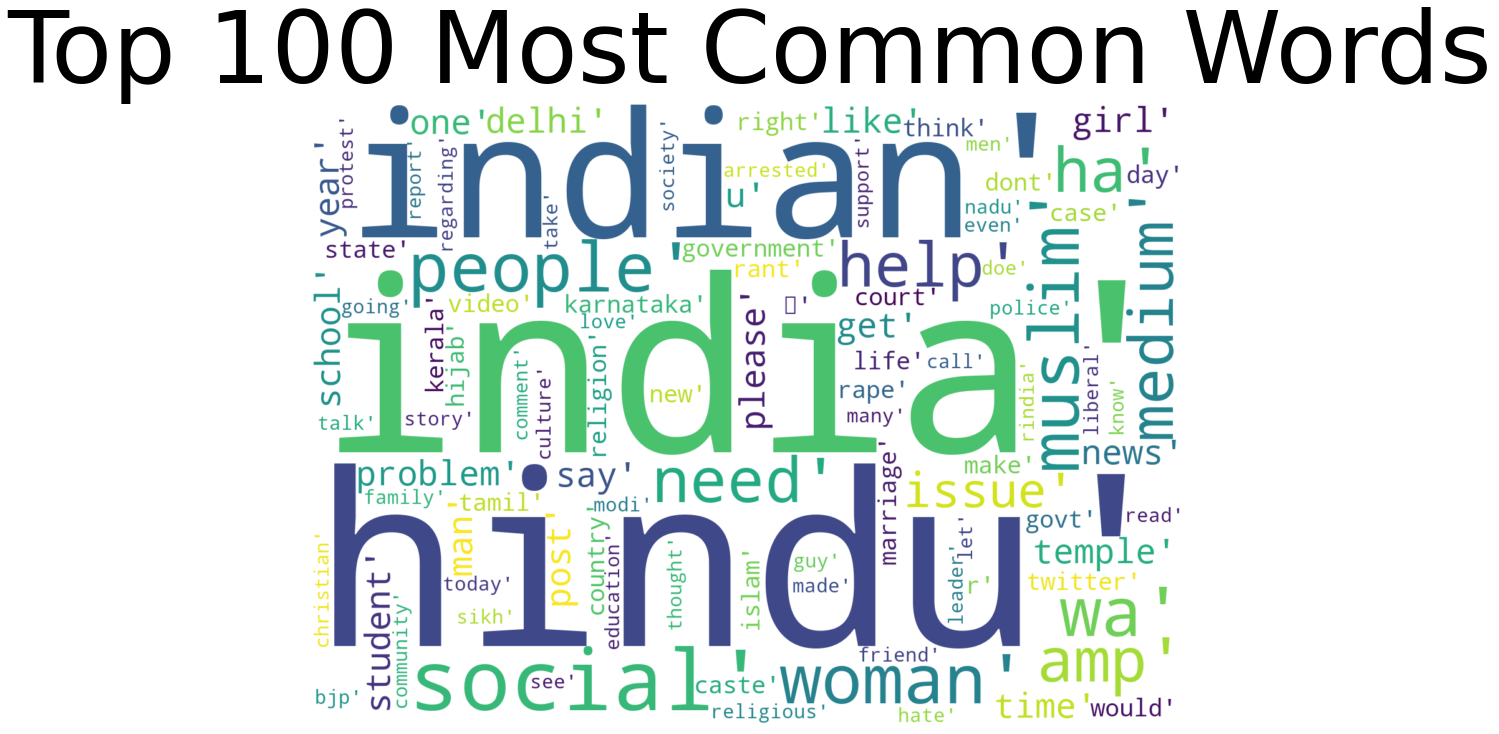

In [ ]:
allwords = []
for title in df['lemma_title']:
    allwords.extend(title.split())

print(len(allwords))

mostcommon = FreqDist(allwords).most_common(100)
wordcloud = WordCloud(width=1400, height=1000, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=100)
plt.tight_layout(pad=0)
plt.show()

At a glance, this word cloud gives us the heartbeat of the discussions and posts that must be happening in the dataset. Words like indian, hindu, muslim, womn, government, police, delhi, twitter, bjp, etc. give us a glimpse into the biggest problems India is currently facing.

In [ ]:
def get_top_n_grams(corpus, n,dim):
    vec = CountVectorizer(stop_words='english',ngram_range=(dim, dim)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return zip(*words_freq[:n])

In [ ]:
word, count = get_top_n_grams(df['ctext'], 25, 2)
fig = go.Figure(
    data=go.Bar(x=word, y=count),
    layout=go.Layout(title_text='Most Frequent Bigrams', 
                     xaxis_title_text='Bigrams', 
                     yaxis_title_text='Count', 
                     bargap=0.2))
fig.show(renderer="colab")

Through the n-gram analysis, we actually start seeing the common occurences emerge from the problems. Data protection, IT, high court, government, and prime minister appear frequently.

In [ ]:
word, count = get_top_n_grams(df['ctext'], 25, 3)
fig = go.Figure(
    data=go.Bar(x=word, y=count),
    layout=go.Layout(title_text='Most Frequent Trigrams', 
                     xaxis_title_text='Trigrams', 
                     yaxis_title_text='Count', 
                     bargap=0.2))
fig.show(renderer="colab")

This is very interesting. We see a large number of mentions relating to technology and laws relating to technology. We also see the mention of relevant authorities who have the power to do something about this: eg. delhi high court, joint parliamentary committee, etc. Another problem that seems to be discussed often is that of Jammu and Kashmir.

In [ ]:
word, count = get_top_n_grams(df['ctitle'], 25, 2)
fig = go.Figure(
    data=go.Bar(x=word, y=count),
    layout=go.Layout(title_text='Most Frequent Bigrams', 
                     xaxis_title_text='Bigrams', 
                     yaxis_title_text='Count', 
                     bargap=0.2))
fig.show(renderer="colab")

Running the analysis on title only gives us a few new terms that have been discussed like mental health, love jihad, etc.

In [ ]:
word, count = get_top_n_grams(df['ctitle'], 25, 3)
fig = go.Figure(
    data=go.Bar(x=word, y=count),
    layout=go.Layout(title_text='Most Frequent Trigrams', 
                     xaxis_title_text='Trigrams', 
                     yaxis_title_text='Count', 
                     bargap=0.2))
fig.show(renderer="colab")

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

clean_text(df)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: FutureWarning:

The default value of regex will change from True to False in a future version.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: FutureWarning:

The default value of regex will change from True to False in a future version.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: FutureWarning:

The default value of regex will change from True to False in a future version.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: FutureWarning:

The default value of regex will change from True to False in a future version.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: FutureWarning:

The default value of regex will change from True to False in a future version.

100%|██████████| 2073/2073 [00:06<00:00, 341.17it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: FutureWarning:

The default value of regex will change from True to False in 

In [ ]:
import gensim

A very important part of this EDA is topic modeling. We are going to be performing topic modeling in two ways:

1. Latent Dirichlet Allocation: Here, we use the title texts only for the analysis and distribute the text into 5 topics. We then visualize the resultings using pyLDAvis

2. Non-negative Matrix Factorization: Here, we use whole texts for analysis and distribute the text into 5 topics.

In [ ]:
tcorpus = []
for text in df['lemma_title']:
    tcorpus.append(text.split())

tgen_dict = gensim.corpora.Dictionary(tcorpus)
tbow_corpus = [tgen_dict.doc2bow(doc) for doc in tcorpus]
tlda_model = gensim.models.LdaMulticore(tbow_corpus, 
                                   num_topics = 5, 
                                   id2word = tgen_dict)
tlda_model.show_topics()

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

[(0,
  '0.016*"india" + 0.014*"caste" + 0.010*"professor" + 0.010*"religion" + 0.009*"indian" + 0.008*"people" + 0.008*"say" + 0.007*"culture" + 0.007*"dead" + 0.007*"discrimination"'),
 (1,
  '0.021*"india" + 0.016*"time" + 0.010*"people" + 0.010*"like" + 0.009*"country" + 0.008*"news" + 0.006*"medium" + 0.006*"u" + 0.006*"make" + 0.005*"buttock"'),
 (2,
  '0.019*"india" + 0.010*"karnataka" + 0.010*"culture" + 0.010*"population" + 0.010*"gun" + 0.010*"song" + 0.010*"year" + 0.010*"professor" + 0.010*"drug" + 0.009*"liquor"'),
 (3,
  '0.012*"help" + 0.010*"wa" + 0.009*"take" + 0.009*"government" + 0.009*"would" + 0.008*"dead" + 0.008*"brain" + 0.008*"survey" + 0.008*"notebook" + 0.007*"islam"'),
 (4,
  '0.015*"hindu" + 0.012*"please" + 0.012*"love" + 0.009*"help" + 0.008*"religion" + 0.008*"work" + 0.008*"jihad" + 0.008*"support" + 0.007*"buttock" + 0.007*"time"')]

In [ ]:
pyLDAvis.enable_notebook()
vis = gvis.prepare(tlda_model, tbow_corpus, tgen_dict)

vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.108627 -0.050971       1        1  22.982649
0      0.110744 -0.147945       2        1  21.174267
4     -0.163139 -0.011189       3        1  20.793892
2      0.128516  0.022831       4        1  19.871284
3      0.032506  0.187274       5        1  15.177908, topic_info=           Term        Freq       Total Category  logprob  loglift
367       caste   86.000000   86.000000  Default  30.0000  30.0000
2994  professor   79.000000   79.000000  Default  29.0000  29.0000
444        love   50.000000   50.000000  Default  28.0000  28.0000
74        india  251.000000  251.000000  Default  27.0000  27.0000
6397     liquor   37.000000   37.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
429        land   12.781194   15.578430   Topic5  -5.4430   1.6874
605        time   16.184642  140.847415   Topic5  -5.2069  -0.2783
600         get   13.816038   39.365258   Topic5  -5.3651   0.8383
104           u   13.480113   67.356838   Topic5  -5.3897   0.2765
302   community   13.133437   34.498133   Topic5  -5.4158   0.9196

[327 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
2725      1  0.981775        3rd
6401      2  0.956338   abhorred
6285      4  0.927461  aboutturn
6314      1  0.991090     active
523       1  0.063479   actually
...     ...       ...        ...
394       1  0.938007      youth
394       2  0.044667      youth
394       5  0.044667      youth
6345      4  0.927405     zameen
6346      4  0.927416      zubah

[570 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 5, 3, 4])

The size of the circle indicates the presence of the topic in the dataset.

The closer the circles, the more the overlap between topics.

When we select a topic, the red lines show the term frequencies for a topic in decreasing order.

**Topics:**

topic 1: school, problem, family, support

topic 2: caste, religion, discrimination, woman, rape

topic 3: jihad, religion, claims

topic 4: karnataka, culture, population, drugs

topic 5: government, survey, kidnapped, suicide

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df =5, max_features=5000, use_idf=True)
tfidf = tfidf_vectorizer.fit_transform(df['lemma_text'])
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
doc_term_matrix_tfidf = pd.DataFrame(tfidf.toarray(), columns=list(tfidf_feature_names))
doc_term_matrix_tfidf.shape

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



(2073, 5000)

In [ ]:
doc_term_matrix_tfidf.head()

,10,100,10th,11,11th,12,12th,13,14,14th,...,youth,youtube,youtubers,youve,yr,zee,zero,zomato,zombie,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                          for i in topic.argsort()[:-no_top_words - 1:-1]]))

nmf = NMF(n_components=5, random_state=42, init='nndsvd').fit(tfidf)
display_topics(nmf, tfidf_feature_names, 20)

Topic 0:
wa people like dont im get life one know time year friend even would want thing social problem ha really
Topic 1:
link data government medium information bill court ha gt privacy rule internet user issue report law protection also order right
Topic 2:
hindu muslim woman temple man girl religion islam religious christian mosque tamil nadu pakistan festival hijab amp minority conversion kerala
Topic 3:
removed attention indian fraud fight read subreddit trouble mental social self activist hinduphobia health petition instagram right swamy awareness logic
Topic 4:
india indian country people caste ha news government nation state population religion world problem culture need china system time many


/usr/local/lib/python3.7/dist-packages/scipy/linalg/decomp_qr.py:20: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/usr/local/lib/python3.7/dist-packages/scipy/linalg/decomp_qr.py:20: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informatio

topic 0: life, friend, social problem

topic 1: government, information bill, privacy, protection

topic 2: religion, woman, kerala

topic 3: mental, trouble, subreddit, instagram

topic 4: population, world, culture



After seeing both the results, the NMF results seem more salient and convincing. Now, we add the topic which each post is classified into as a part of the dataframe itself. This will help us create a predictive model for the same.


In [ ]:
nmf_topic_values = nmf.transform(tfidf)

In [ ]:
nmf_topic_values.shape

(2073, 5)

In [ ]:
df['nmf_topics'] = nmf_topic_values.argmax(axis=1)

In [ ]:
len(tbow_corpus)

2073

In [ ]:
tlda_topic_values = []
for text in tbow_corpus:
    probs = tlda_model[text]
    probs = np.array([j for i,j in probs])
    # print(probs)
    tlda_topic_values.append(np.argmax(probs))
tlda_topic_values[:5]

[0, 3, 3, 4, 4]

In [ ]:
df['lda_topics'] = tlda_topic_values

In [ ]:
df['nmf_topics'].value_counts()

0    691
4    557
2    420
1    328
3     77
Name: nmf_topics, dtype: int64

In [ ]:
df['lda_topics'].value_counts()

0    515
1    487
2    416
4    381
3    274
Name: lda_topics, dtype: int64

In [ ]:
df.head()

,author,created_utc,full_link,is_original_content,is_self,is_video,link_flair_text,num_comments,over_18,score,...,second,ctext,lemma_text,date,word_count,ctitle,lemma_title,tword_count,nmf_topics,lda_topics
0,InternetFreedomIn,1628168541,https://www.reddit.com/r/india/comments/oyh2uq...,False,True,False,Policy/Economy,0,False,1,...,21,cybersec charcha a global overview of the sta...,cybersec charcha global overview state surveil...,2021-08-05 13:02:21,1180,cybersec charcha a global overview of the sta...,cybersec charcha global overview state surveil...,14,1,0
1,adam0010101,1628452706,https://www.reddit.com/r/india/comments/p0lpok...,False,True,False,Politics,0,False,1,...,26,indian social divisions and political redresse...,indian social division political redress despi...,2021-08-08 19:58:26,33,indian social divisions and political redresses,indian social division political redress,6,4,3
2,MaharajadhirajaSawai,1629126680,https://www.reddit.com/r/india/comments/p5i0b6...,False,True,False,History,9,False,1,...,20,my critique of the carvaka podcasts warhorse e...,critique carvaka podcasts warhorse evolution e...,2021-08-16 15:11:20,3812,my critique of the carvaka podcasts warhorse e...,critique carvaka podcasts warhorse evolution e...,20,0,3
3,InternetFreedomIn,1627026319,https://www.reddit.com/r/india/comments/opxkgc...,False,True,False,Policy/Economy,11,False,1,...,19,dear standing committee we have some questions...,dear standing committee question pegasus ampx2...,2021-07-23 07:45:19,1657,dear standing committee we have some questions...,dear standing committee question pegasus,9,1,4
4,wanderingmind,1628683922,https://www.reddit.com/r/india/comments/p2btn6...,False,True,False,Non-Political,17,False,1,...,2,barking biting stray dogs hypocritical doglove...,barking biting stray dog hypocritical doglover...,2021-08-11 12:12:02,843,barking biting stray dogs hypocritical doglove...,barking biting stray dog hypocritical doglover...,10,0,4


In [ ]:
lda_topic_dict = {
    0: "school, problem, family, support",
    1: "caste, religion, discrimination, woman, rape",
    2: "jihad, religion, claims",
    3: "karnataka, culture, population, drugs",
    4: "government, survey, kidnapped, suicide"
}

nmf_topic_dict = {
    0: "life, friend, social problem",
    1: "government, information bill, privacy, protection",
    2: "religion, woman, kerala",
    3: "mental, trouble, subreddit, instagram",
    4: "population, world, culture"
}

In [ ]:
df['nmf_topics_text'] = df['nmf_topics'].apply(lambda x: nmf_topic_dict[x])
df['lda_topics_text'] = df['lda_topics'].apply(lambda x: lda_topic_dict[x])

In [ ]:
df.to_pickle('/content/drive/MyDrive/Wysa/with_topics.pkl')

In [ ]:
x = list(df['nmf_topics_text'].value_counts().keys())
y = list(df['nmf_topics_text'].value_counts())
fig = go.Figure(
    data=go.Bar(x=x, y=y),
    layout=go.Layout(title_text='Topic Dist', 
                     xaxis_title_text='Topics', 
                     yaxis_title_text='Count', 
                     bargap=0.2))
fig.show(renderer="colab")

In [ ]:
x = list(df['lda_topics_text'].value_counts().keys())
y = list(df['lda_topics_text'].value_counts())
fig = go.Figure(
    data=go.Bar(x=x, y=y),
    layout=go.Layout(title_text='Topic Dist', 
                     xaxis_title_text='Topics', 
                     yaxis_title_text='Count', 
                     bargap=0.2))
fig.show(renderer="colab")

Now, we will perform sentiment polarity analysis for understanding the polarity distribution across all posts, different flairs, and different topics.

In [ ]:
#TextBlob("This is great").sentiment.polarity

df['polarity'] = df['ctitle'].apply(lambda text: TextBlob(text).sentiment.polarity)

In [ ]:
df['polarity'].describe()

count    2073.000000
mean        0.013975
std         0.232182
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.033333
max         1.000000
Name: polarity, dtype: float64

In [ ]:
y0 = df.loc[df['link_flair_text'] == 'Politics']['polarity']
y1 = df.loc[df['link_flair_text'] == 'Non-Political']['polarity']
y2 = df.loc[df['link_flair_text'] == 'Policy/Economy']['polarity']
y3 = df.loc[df['link_flair_text'] == 'AskIndia']['polarity']

trace0 = go.Box(
    y=y0,
    name = 'Politics',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)
trace1 = go.Box(
    y=y1,
    name = 'Non-Political',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)
trace2 = go.Box(
    y=y2,
    name = 'Policy/Economy',
    marker = dict(
        color = 'rgb(10, 140, 208)',
    )
)
trace3 = go.Box(
    y=y3,
    name = 'AskIndia',
    marker = dict(
        color = 'rgb(12, 102, 14)',
    )
)
data = [trace0, trace1, trace2, trace3]
layout = go.Layout(
    title = "Polarity Boxplot flair-wise"
)
fig = go.Figure(data=data,layout=layout)
fig.show(renderer='colab')

Observation: Policy/Economy posts observe lesser deviation from the centre than that of the remaining flairs.

Insight: For a more neutral facing discussion rather than a heated emotional one, Policy/Economy is the right flair to go with.

In [ ]:
y0 = df.loc[df['nmf_topics'] == 0]['polarity']
y1 = df.loc[df['nmf_topics'] == 1]['polarity']
y2 = df.loc[df['nmf_topics'] == 2]['polarity']
y3 = df.loc[df['nmf_topics'] == 3]['polarity']
y4 = df.loc[df['nmf_topics'] == 4]['polarity']

trace0 = go.Box(
    y=y0,
    name = nmf_topic_dict[0],
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)
trace1 = go.Box(
    y=y1,
    name = nmf_topic_dict[1],
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)
trace2 = go.Box(
    y=y2,
    name = nmf_topic_dict[2],
    marker = dict(
        color = 'rgb(10, 140, 208)',
    )
)
trace3 = go.Box(
    y=y3,
    name = nmf_topic_dict[3],
    marker = dict(
        color = 'rgb(12, 102, 14)',
    )
)
trace4 = go.Box(
    y=y4,
    name = nmf_topic_dict[4],
    marker = dict(
        color = 'rgb(128, 102, 0)',
    )
)
data = [trace0, trace1, trace2, trace3, trace4]
layout = go.Layout(
    title = "Polarity Boxplot nmf-topic-wise"
)
fig = go.Figure(data=data,layout=layout)
fig.show(renderer='colab')

We see that the religion topic is generally leaning towards a more negative polarity.

In [ ]:
y0 = df.loc[df['lda_topics'] == 0]['polarity']
y1 = df.loc[df['lda_topics'] == 1]['polarity']
y2 = df.loc[df['lda_topics'] == 2]['polarity']
y3 = df.loc[df['lda_topics'] == 3]['polarity']
y4 = df.loc[df['lda_topics'] == 4]['polarity']

trace0 = go.Box(
    y=y0,
    name = lda_topic_dict[0],
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)
trace1 = go.Box(
    y=y1,
    name = lda_topic_dict[1],
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)
trace2 = go.Box(
    y=y2,
    name = lda_topic_dict[2],
    marker = dict(
        color = 'rgb(10, 140, 208)',
    )
)
trace3 = go.Box(
    y=y3,
    name = lda_topic_dict[3],
    marker = dict(
        color = 'rgb(12, 102, 14)',
    )
)
trace4 = go.Box(
    y=y4,
    name = lda_topic_dict[4],
    marker = dict(
        color = 'rgb(128, 102, 0)',
    )
)
data = [trace0, trace1, trace2, trace3, trace4]
layout = go.Layout(
    title = "Polarity Boxplot lda-topic-wise"
)
fig = go.Figure(data=data,layout=layout)
fig.show(renderer='colab')

Finally, we observe a correlation matrix between our numerical features listed below.

In [ ]:
df_red = df[["num_comments", "score", "upvote_ratio", "tword_count", "nmf_topics", "lda_topics", "polarity"]]
df_red.shape

(2073, 7)

In [ ]:
df_red.corr()

,num_comments,score,upvote_ratio,tword_count,nmf_topics,lda_topics,polarity
num_comments,1.000000,0.520330,-0.046142,0.003165,-0.060304,-0.039197,-0.000077
score,0.520330,1.000000,-0.051805,0.010396,-0.073598,-0.027031,-0.008721
upvote_ratio,-0.046142,-0.051805,1.000000,0.005857,0.035660,0.026432,-0.027947
tword_count,0.003165,0.010396,0.005857,1.000000,0.021128,-0.239079,0.023096
nmf_topics,-0.060304,-0.073598,0.035660,0.021128,1.000000,-0.053245,0.003683
lda_topics,-0.039197,-0.027031,0.026432,-0.239079,-0.053245,1.000000,-0.033795
polarity,-0.000077,-0.008721,-0.027947,0.023096,0.003683,-0.033795,1.000000


In [ ]:
# import plotly.express as px
corr_df = df_red.corr()
fig = go.Figure(data=go.Heatmap(
                    z=corr_df, 
                    colorscale="Blues", 
                    x=["num_comments", "score", "upvote_ratio", "tword_count", "nmf_topics", "lda_topics", "polarity"],
                    y=["num_comments", "score", "upvote_ratio", "tword_count", "nmf_topics", "lda_topics", "polarity"]))
fig.show(renderer='colab')


There is no particularly strong correlation we find except for that between num_comments and score, which is a really expected correlation. The next highest correlation is that between nmf_topics and upvote ratio.

In [ ]:
df.to_pickle('/content/drive/MyDrive/Wysa/final.pkl')